## Load libraries

In [21]:
import numpy
from pandas import read_csv
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## convert an array of values into a dataset matrix

In [22]:
def create_dataset(dataset,look_back=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(look_back+i),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)

## load the dataset

In [23]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv("Desktop\\airline-passengers.csv", usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')

## normalize the dataset

In [24]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

## split dataset into train and test datasets

In [25]:
train_size=int(len(dataset)*0.67)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]

## reshape into X=t and Y=t+1

When phrased as a regression problem, the input variables are t-2, t-1, t and the output variable is t+1.

The create_dataset() function we created in the previous section allows us to create this formulation of the time series problem by increasing the look_back argument from 1 to 3.

In [26]:
look_back=3
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)


## reshape input to be [samples, time steps, features]

We can use the sizes in the shape attribute on the array to specify the number of samples (rows) and fix the number of features at 1 and columns (time steps) .

In [27]:
trainX=numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=numpy.reshape(testX,(testX.shape[0],1,testX.shape[1]))


## create and fit the LSTM network

In [28]:
model=Sequential()
model.add(LSTM(1,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
 - 1s - loss: 0.0185
Epoch 2/100
 - 0s - loss: 0.0099
Epoch 3/100
 - 0s - loss: 0.0087
Epoch 4/100
 - 0s - loss: 0.0081
Epoch 5/100
 - 0s - loss: 0.0075
Epoch 6/100
 - 0s - loss: 0.0069
Epoch 7/100
 - 0s - loss: 0.0064
Epoch 8/100
 - 0s - loss: 0.0061
Epoch 9/100
 - 0s - loss: 0.0057
Epoch 10/100
 - 0s - loss: 0.0054
Epoch 11/100
 - 0s - loss: 0.0053
Epoch 12/100
 - 0s - loss: 0.0050
Epoch 13/100
 - 0s - loss: 0.0049
Epoch 14/100
 - 0s - loss: 0.0047
Epoch 15/100
 - 0s - loss: 0.0047
Epoch 16/100
 - 0s - loss: 0.0047
Epoch 17/100
 - 0s - loss: 0.0046
Epoch 18/100
 - 0s - loss: 0.0045
Epoch 19/100
 - 0s - loss: 0.0045
Epoch 20/100
 - 0s - loss: 0.0044
Epoch 21/100
 - 0s - loss: 0.0044
Epoch 22/100
 - 0s - loss: 0.0043
Epoch 23/100
 - 0s - loss: 0.0043
Epoch 24/100
 - 0s - loss: 0.0043
Epoch 25/100
 - 0s - loss: 0.0042
Epoch 26/100
 - 0s - loss: 0.0042
Epoch 27/100
 - 0s - loss: 0.0044
Epoch 28/100
 - 0s - loss: 0.0042
Epoch 29/100
 - 0s - loss: 0.0041
Epoch 30/100
 - 0s - lo

## make predictions

In [29]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

## invert predictions

In [30]:
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

## calculate root mean squared error

In [31]:
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print("train score:",(trainScore))
testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print("test score :",(testScore))

train score: 28.476844212915935
test score : 80.36412975009708


##  plotting

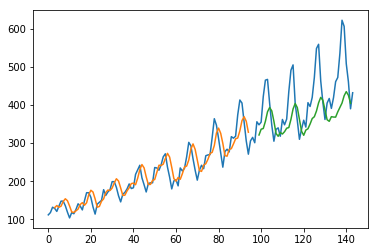

In [32]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

We can see that the error was increased slightly compared to that of the previous section. The window size and the network architecture were not tuned: this is just a demonstration of how to frame a prediction problem.